# Image Features Extraction

### A document object package for fast extraction of features from segmentable images 


# Introduction 



<img src="1.png">

<img src="7c.png">

## Features extraction for spatial Classification of nuclei

<img src="2b.png">

<img src="3.png">

## Collection objects and Iterators

<img src="4b.png">

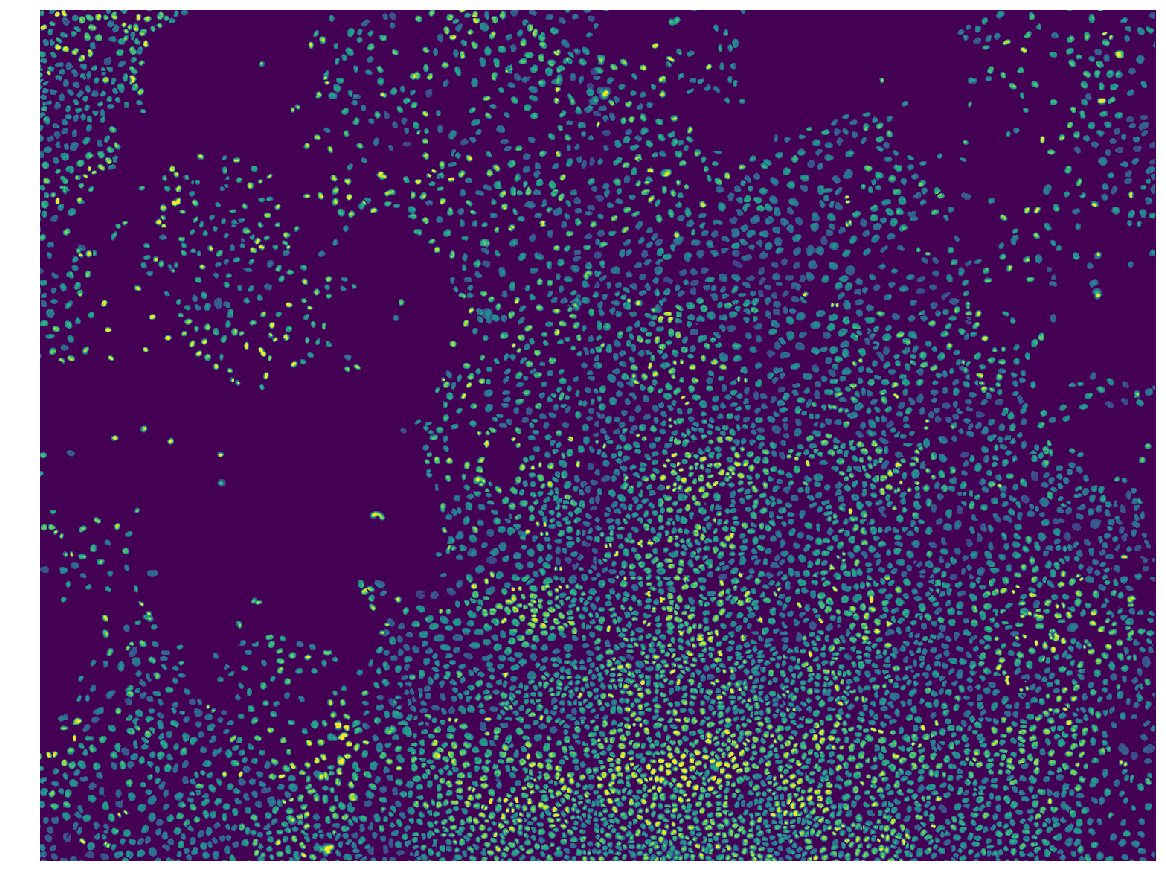

In [23]:
from skimage import filters, io

I1 = io.imread('../images/CA/1/ORG_8bit.tif')

I2 = io.imread('../images/CA/1/ORG_bin.tif')

I3 = I1 * (I2/255)


fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(I3)

ax.set_axis_off()
plt.show()


# Tutorial

In [2]:
% matplotlib inline
import matplotlib.pyplot as plt

import image_features_extraction.Images as fe

    
IMGS = fe.Images('../images/CA/1')


# the iterator at work ...
for IMG in IMGS:
    print(IMG.file_name())
    


../images/CA/1/ORG_8bit.tif
../images/CA/1/ORG_bin.tif


## Show segmentation

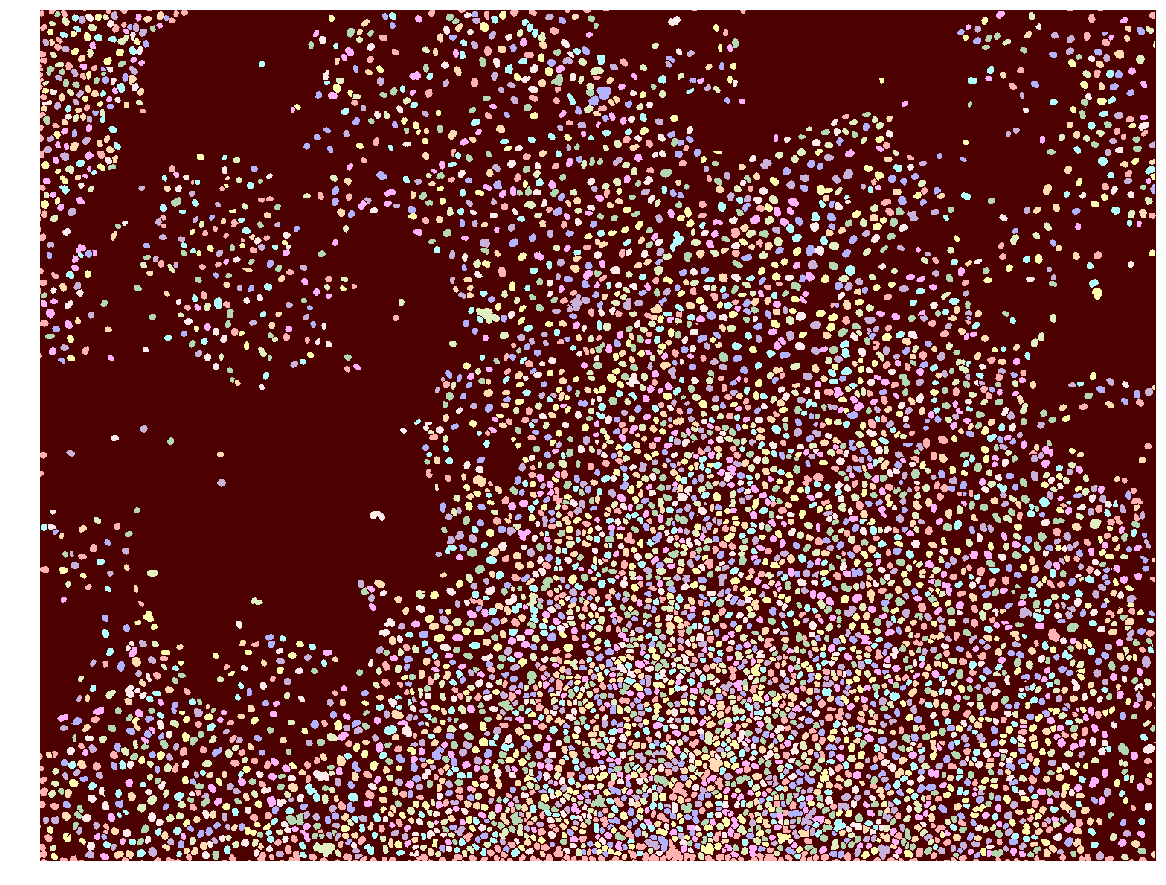

In [5]:
IMG = IMGS.item(1)

IMG.set_image_intensity(IMGS.item(0))

imgrgb = IMG.get_image_segmentation()


fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(imgrgb)

ax.set_axis_off()
plt.show()


## Property values (e.g., area)

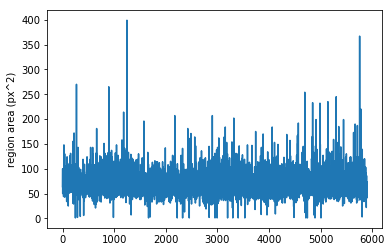

In [6]:

REGS = IMG.regions()


areas = REGS.prop_values('area')


plt.plot(areas)
plt.ylabel('region area (px^2)')

In [7]:
IMG = IMGS.item(0)

features = IMG.features(['label', 'area','perimeter', 'centroid'], class_value=5)


features.get_dataframe().head()


,label,area,perimeter,centroid_x,centroid_y,class_name
0,19,38,20.485281,4.552632,182.631579,5
1,20,72,29.556349,5.625000,1290.361111,5
2,21,116,44.970563,9.801724,585.103448,5
3,22,48,25.899495,6.895833,600.145833,5
4,23,68,27.899495,6.470588,621.588235,5


## Obtaining the features table from a single image

In [8]:
print('Num regions: {}'.format(REGS.count()))


features = REGS.features(['label', 'area','perimeter', 'centroid'], class_value=5)


features.get_dataframe().head()
df = features.get_dataframe()

Num regions: 5900


## Example of feature extraction from giving and external intensity image

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import image_features_extraction.Images as fe

    
IMGS = fe.Images('../images/CA/1')

# the iterator at work ...
for IMG in IMGS:
    print(IMG.file_name())


../images/CA/1/ORG_8bit.tif
../images/CA/1/ORG_bin.tif


In [10]:
IMG = IMGS.item(1)
IMG.set_image_intensity(IMGS.item(0))


features = IMG.features(['label', 'area','perimeter', 'centroid','major_axis_length', 'moments','mean_intensity'], class_value=5)

df = features.get_dataframe()





In [11]:
print(df.moments[1])

df.head()

[[  8.60000000e+01   4.66000000e+02   3.26800000e+03   2.57260000e+04]
 [  3.91000000e+02   2.06700000e+03   1.44130000e+04   1.13571000e+05]
 [  2.25300000e+03   1.17470000e+04   8.03170000e+04   6.21971000e+05]
 [  1.44970000e+04   7.47870000e+04   5.00413000e+05   3.79673100e+06]]


,label,area,perimeter,centroid_x,centroid_y,major_axis_length,moments,mean_intensity,class_name
0,22,64,28.278175,5.468750,584.375000,9.593860,"[[64.0, 286.0, 1630.0, 10366.0], [280.0, 1223....",170.078125,5
1,23,86,33.556349,6.418605,621.546512,11.832643,"[[86.0, 466.0, 3268.0, 25726.0], [391.0, 2067....",139.127907,5
2,24,100,35.556349,5.720000,1290.330000,13.518014,"[[100.0, 472.0, 2988.0, 21442.0], [533.0, 2238...",99.360000,5
3,25,50,24.142136,5.600000,23.040000,8.587185,"[[50.0, 180.0, 846.0, 4458.0], [202.0, 699.0, ...",181.940000,5
4,26,80,31.556349,7.325000,99.462500,11.382234,"[[80.0, 426.0, 2894.0, 21846.0], [357.0, 1969....",157.675000,5


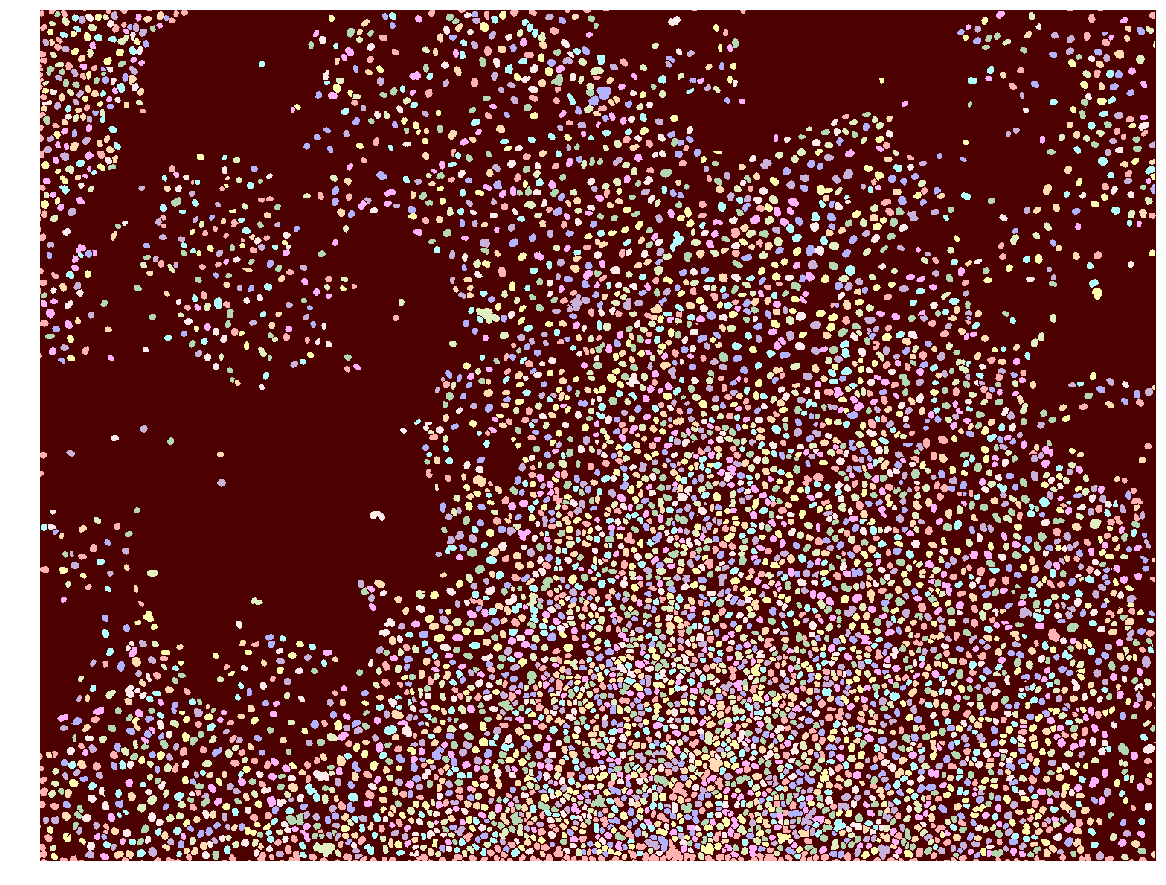

In [12]:
imgrgb = IMG.get_image_segmentation()


fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(imgrgb)

ax.set_axis_off()
plt.show()


In [5]:
type(features)

NoneType

### Plot area vs perimeter and area histogram

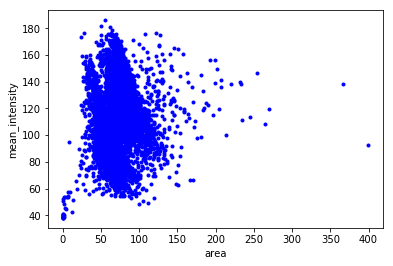

In [7]:

plt.plot(df.area, df.mean_intensity, '.b')
plt.xlabel('area')
plt.ylabel('mean_intensity')

(array([  22.,    5.,    2.,    1.,    2.,    7.,   16.,   35.,   63.,
         120.,  209.,  336.,  474.,  517.,  487.,  458.,  459.,  450.,
         419.,  366.,  301.,  252.,  180.,  144.,  116.,   92.,   63.,
          60.,   43.,   37.,   31.,   23.,   20.,   10.,    8.,   11.,
           9.,    5.,    5.,    4.,    4.,    2.,    4.,    2.,    0.,
           4.,    2.,    2.,    1.,    2.,    1.,    3.,    0.,    1.,
           0.,    1.,    0.,    0.,    3.,    0.,    0.,    1.,    0.,
           1.,    0.,    0.,    1.,    1.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([   1.  ,    4.98,    8.96,   12.94,   16.92,   20.9 ,   24.88,
          28.86,   32.84,   36.82,   40.8 ,   44.78,   48.76,   52.74,
          56.72,   60.7 ,   64.68,   68.66,   72.64,   76.62,   80.6

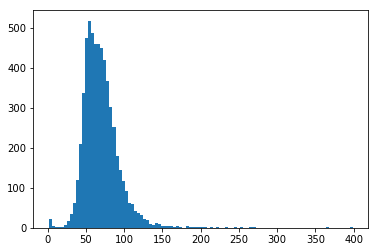

In [13]:
plt.hist(df.area,100)

### Show the region centroids

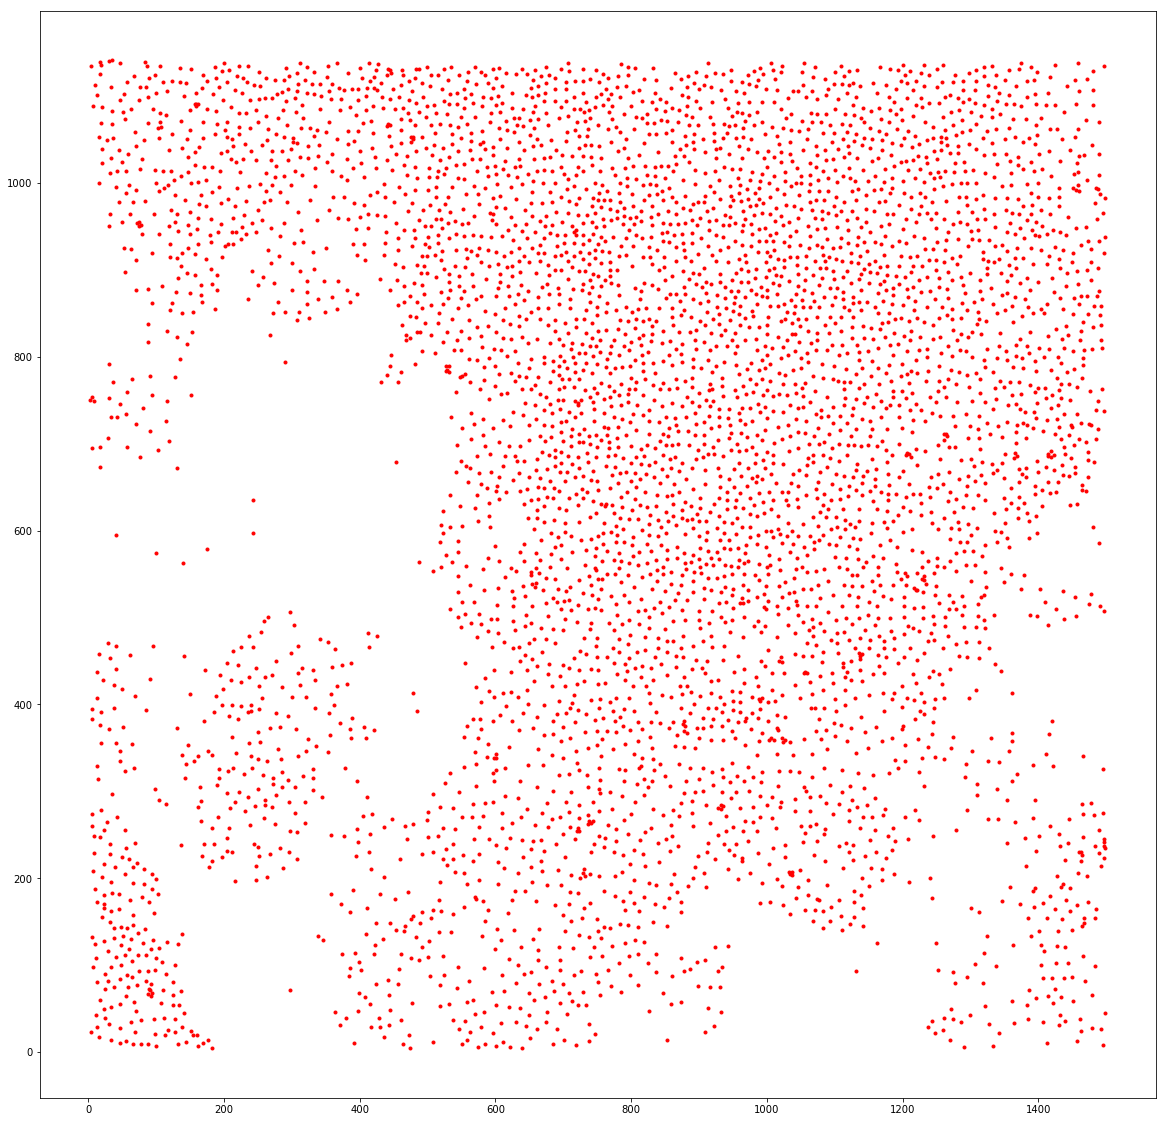

In [22]:

import numpy as np
a = np.array(df.centroid)
x=[]
y=[]
for i in a:
    x.append(i[0])
    y.append(i[1])

    
fig, axes = plt.subplots(figsize=(20, 20), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})

plt.plot(y,x, '.r')

## Storage: Business and data layer 

<img src="8.png">

In [2]:
import image_features_extraction.Images as fe

    
IMGS = fe.Images('../images/CA')



('Error: folder name does not exist',)


In [24]:
import image_features_extraction.Images as fe

    
IMGS = fe.Images('../images/EDGE')

storage_name = '../images/DB1.csv'
class_value = 1

for IMG in IMGS:
    print(IMG.file_name())
    
    REGS = IMG.regions()
    
    FEATURES = REGS.features(['area','perimeter', 'extent', 'equivalent_diameter', 'eccentricity'], class_value=class_value)
    
    FEATURES.save(storage_name, type_storage='file', do_append=True)
    
    
    

../images/EDGE/ca_1.tif
../images/EDGE/ca_2.tif
../images/EDGE/ca_3.tif


# Pytest: Units test

In [4]:
!py.test

============================= test session starts ==============================
platform darwin -- Python 3.5.3, pytest-3.1.3, py-1.4.34, pluggy-0.4.0
rootdir: /Users/remi/Google Drive/INSIGHT PRJ/PRJ/Image-Features-Extraction, inifile:
collected 0 items 

========================= no tests ran in 0.00 seconds =========================


In [58]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import itertools

import pandas as pd
import numpy as np
df_train=pd.read_csv(storage_name)

n = df_train.shape[1]

X = df_train.iloc[:,0:n-1]
Y = df_train.iloc[:,n-1]

Xtrain,Xtest, Ytrain,Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 30)

0.662082514735
[ 0.74477868  0.25522132]
             precision    recall  f1-score   support

          0       0.68      0.91      0.78       656
          1       0.57      0.21      0.30       362

avg / total       0.64      0.66      0.61      1018

Confusion matrix, without normalization
[[599  57]
 [287  75]]


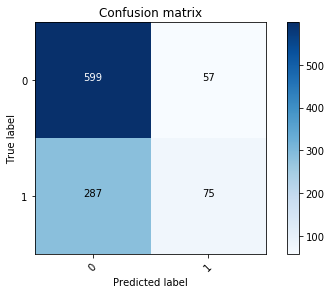

In [60]:
params = {'n_estimators': 3000, 'max_depth': 2, 'min_samples_split': 2,
         'learning_rate': 0.001}
model_gb = GradientBoostingClassifier(**params)
model_gb.fit(Xtrain,Ytrain)
Y_pred = model_gb.predict(Xtest)

print(model_gb.score(Xtest, Ytest))
print(model_gb.predict_proba(Xtest)[0])
print(classification_report(Ytest,Y_pred, target_names=['0','1']))

cm = metrics.confusion_matrix(Ytest, Y_pred)
plot_confusion_matrix(cm, ['0','1'])

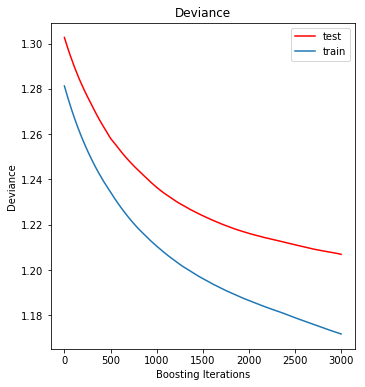

In [61]:
ne = len(model_gb.estimators_)
test_error = np.empty(ne)

for i,pred in enumerate(model_gb.staged_decision_function(Xtest)):
    test_error[i] = model_gb.loss_(np.array(Ytest), pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(ne), test_error, '-r', label='test')
plt.plot(np.arange(ne), model_gb.train_score_, label='train')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

In [62]:
a = pd.DataFrame(Ytrain)
a = a.iloc[:,0].value_counts()
print('number of observations/class')
print(a)

number of observations/class
0    1568
1     806
Name: class_name, dtype: int64


In [68]:
def sample_weights(Y):
    sample_weights = np.empty(len(Y))

    w = pd.DataFrame(Y)
    a = np.array(w.iloc[:,0].value_counts())

    w[w.class_name==0] = 0.50/a[0]
    w[w.class_name==1] = 0.50/a[1]

    return np.array(w)*1000

sw = sample_weights(Ytrain)

/Users/remi/anaconda/envs/remi_insight/lib/python3.5/site-packages/sklearn/ensemble/gradient_boosting.py:978: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  sample_weight = column_or_1d(sample_weight, warn=True)


0.636542239686
[ 0.74325475  0.25674525]
             precision    recall  f1-score   support

          0       0.77      0.62      0.69       656
          1       0.49      0.67      0.57       362

avg / total       0.67      0.64      0.64      1018

Confusion matrix, without normalization
[[407 249]
 [121 241]]


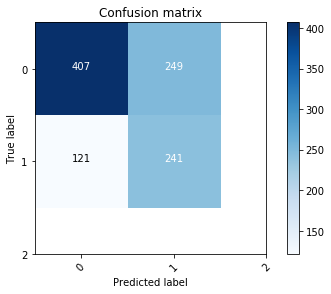

In [70]:
params = {'n_estimators': 3000, 'max_depth': 2, 'min_samples_split': 3,
         'learning_rate': 0.01}
model_gb = GradientBoostingClassifier(**params)
#model_gb = GradientBoostingClassifier(n_estimators=1000)
model_gb.fit(Xtrain,Ytrain, sample_weight= sw)
Y_pred = model_gb.predict(Xtest)
print(model_gb.score(Xtest, Ytest))
print(model_gb.predict_proba(Xtest)[0])
print(classification_report(Ytest,Y_pred, target_names=['0','1','2','3']))
cm = metrics.confusion_matrix(Ytest, Y_pred)
plot_confusion_matrix(cm, ['0','1','2'])

In [67]:
sw

array([[ 0.31887755],
       [ 0.        ],
       [ 0.        ],
       ..., 
       [ 0.31887755],
       [ 0.        ],
       [ 0.        ]])